# <center>Capstone Project - What's The Food<center>

### Import Libraries

In [23]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import PIL
import tensorflow_hub as hub
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from PIL import Image, ImageFile, UnidentifiedImageError
from bing_image_downloader import downloader
from pathlib import Path
ImageFile.LOAD_TRUNCATED_IMAGES = True

### Training Directory

In [24]:
train_dir = 'food_images/train'

train_dir_ayam = os.path.join(train_dir, 'ayam_goreng')
train_dir_bakso = os.path.join(train_dir, 'bakso')
train_dir_batagor = os.path.join(train_dir, 'batagor')
train_dir_bubur = os.path.join(train_dir, 'bubur')
train_dir_burger = os.path.join(train_dir, 'burger')
train_dir_capcay = os.path.join(train_dir, 'capcay')
train_dir_crepes = os.path.join(train_dir, 'crepes')
train_dir_cumi = os.path.join(train_dir, 'cumi_goreng_tepung')
train_dir_fu_yung_hai = os.path.join(train_dir, 'fu_yung_hai')
train_dir_gado_gado = os.path.join(train_dir, 'gado_gado')
train_dir_gudeg = os.path.join(train_dir, 'gudeg')
train_dir_ikan = os.path.join(train_dir, 'ikan_bakar')
train_dir_kebab = os.path.join(train_dir, 'kebab')
train_dir_rendang = os.path.join(train_dir, 'rendang')
train_dir_sate = os.path.join(train_dir, 'sate')

### Testing Directory

In [25]:
test_dir = 'food_images/test'

test_dir_ayam = os.path.join(test_dir, 'ayam_goreng')
test_dir_bakso = os.path.join(test_dir, 'bakso')
test_dir_batagor = os.path.join(test_dir, 'batagor')
test_dir_bubur = os.path.join(test_dir, 'bubur')
test_dir_burger = os.path.join(test_dir, 'burger')
test_dir_capcay = os.path.join(test_dir, 'capcay')
test_dir_crepes = os.path.join(test_dir, 'crepes')
test_dir_cumi = os.path.join(test_dir, 'cumi_goreng_tepung')
test_dir_fu_yung_hai = os.path.join(test_dir, 'fu_yung_hai')
test_dir_gado_gado = os.path.join(test_dir, 'gado_gado')
test_dir_gudeg = os.path.join(test_dir, 'gudeg')
test_dir_ikan = os.path.join(test_dir, 'ikan_bakar')
test_dir_kebab = os.path.join(test_dir, 'kebab')
test_dir_rendang = os.path.join(test_dir, 'rendang')
test_dir_sate = os.path.join(test_dir, 'sate')

### Number of Images for Each Train and Test Class

In [26]:
print('\nTotal training ayam goreng images:', len(os.listdir(train_dir_ayam)))
print('Total validation ayam goreng images:', len(os.listdir(test_dir_ayam)))

print('\nTotal training bakso images:', len(os.listdir(train_dir_bakso)))
print('Total validation bakso images:', len(os.listdir(test_dir_bakso)))

print('\nTotal training batagor images:', len(os.listdir(train_dir_batagor)))
print('Total validation batagor images:', len(os.listdir(test_dir_batagor)))

print('\nTotal training bubur images:', len(os.listdir(train_dir_bubur)))
print('Total validation bubur images:', len(os.listdir(test_dir_bubur)))

print('\nTotal training burger images:', len(os.listdir(train_dir_burger)))
print('Total validation burger images:', len(os.listdir(test_dir_burger)))

print('\nTotal training capcay images:', len(os.listdir(train_dir_capcay)))
print('Total validation capcay images:', len(os.listdir(test_dir_capcay)))

print('\nTotal training crepes images:', len(os.listdir(train_dir_crepes)))
print('Total validation crepes images:', len(os.listdir(test_dir_crepes)))

print('\nTotal training cumi goreng tepung images:', len(os.listdir(train_dir_cumi)))
print('Total validation cumi goreng tepung images:', len(os.listdir(test_dir_cumi)))

print('\nTotal training fu yung hai images:', len(os.listdir(train_dir_fu_yung_hai)))
print('Total validation fu yung hai images:', len(os.listdir(test_dir_fu_yung_hai)))

print('\nTotal training gado gado images:', len(os.listdir(train_dir_gado_gado)))
print('Total validation gado gado images:', len(os.listdir(test_dir_gado_gado)))

print('\nTotal training gudeg images:', len(os.listdir(train_dir_gudeg)))
print('Total validation gudeg images:', len(os.listdir(test_dir_gudeg)))

print('\nTotal training ikan bakar images:', len(os.listdir(train_dir_ikan)))
print('Total validation ikan bakar images:', len(os.listdir(test_dir_ikan)))

print('\nTotal training kebab images:', len(os.listdir(train_dir_kebab)))
print('Total validation kebab images:', len(os.listdir(test_dir_kebab)))

print('\nTotal training rendang images:', len(os.listdir(train_dir_rendang)))
print('Total validation rendang images:', len(os.listdir(test_dir_rendang)))

print('\nTotal training sate images:', len(os.listdir(train_dir_sate)))
print('Total validation sate images:', len(os.listdir(test_dir_sate)))


Total training ayam goreng images: 500
Total validation ayam goreng images: 200

Total training bakso images: 500
Total validation bakso images: 200

Total training batagor images: 493
Total validation batagor images: 198

Total training bubur images: 499
Total validation bubur images: 200

Total training burger images: 496
Total validation burger images: 199

Total training capcay images: 497
Total validation capcay images: 198

Total training crepes images: 496
Total validation crepes images: 199

Total training cumi goreng tepung images: 500
Total validation cumi goreng tepung images: 200

Total training fu yung hai images: 500
Total validation fu yung hai images: 200

Total training gado gado images: 500
Total validation gado gado images: 200

Total training gudeg images: 500
Total validation gudeg images: 198

Total training ikan bakar images: 498
Total validation ikan bakar images: 200

Total training kebab images: 493
Total validation kebab images: 199

Total training rendang i

### Downloading Extra Datasets

In [169]:
downloader.download('kebab.jpg', 
                    limit = 39,  
                    output_dir = 'food_images/train/kebab', 
                    adult_filter_off = True, 
                    force_replace = False, 
                    timeout = 60, 
                    verbose = True)

[%] Downloading Images to D:\TC\Jupyter Notebook\Capstone Project\food_images\train\kebab\kebab.jpg


[!!]Indexing page: 1

[%] Indexed 39 Images on Page 1.


[%] Downloading Image #1 from https://vignette.wikia.nocookie.net/micronations/images/0/09/Kebab_%26_Chips.jpg/revision/latest/scale-to-width-down/2000?cb=20130226113027
[%] File Downloaded !

[%] Downloading Image #2 from https://www.gourmetkebab.es/wp-content/uploads/2019/09/doner-kebab-shawarma.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://thumbs.dreamstime.com/b/doner-kebab-grilled-meat-bread-vegetables-39463283.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://external-preview.redd.it/dhOW7zxfGVyUwUaEQAp4UJuEF5KU24d1KjjJtaqoYL8.jpg?auto=webp&amp;s=1796795c6f24e9b0f782151b1bd51e9ba8324e34
[!] Issue getting: https://external-preview.redd.it/dhOW7zxfGVyUwUaEQAp4UJuEF5KU24d1KjjJtaqoYL8.jpg?auto=webp&amp;s=1796795c6f24e9b0f782151b1bd51e9ba8324e34
[!] Error:: HTTP Error 403: Forbidden
[%] Download

[%] File Downloaded !

[%] Downloading Image #24 from http://www.linzwiki.at/w/images/thumb/f/f8/Pizza_Kebab_Baron.jpg/687px-Pizza_Kebab_Baron.jpg
[!] Issue getting: http://www.linzwiki.at/w/images/thumb/f/f8/Pizza_Kebab_Baron.jpg/687px-Pizza_Kebab_Baron.jpg
[!] Error:: timed out
[%] Downloading Image #24 from https://upload.wikimedia.org/wikipedia/commons/thumb/f/f0/Iskender_kebab.jpg/800px-Iskender_kebab.jpg
[%] File Downloaded !

[%] Downloading Image #25 from https://freepngimg.com/thumb/grocery/56186-3-kebab-free-transparent-image-hq.png
[!] Issue getting: https://freepngimg.com/thumb/grocery/56186-3-kebab-free-transparent-image-hq.png
[!] Error:: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1125)>
[%] Downloading Image #25 from https://thumbs.dreamstime.com/z/delicious-dishes-turkish-cuisine-doner-kebab-rotary-cooked-rotary-cooked-turkish-chicken-doner-kebab-138066693.jpg
[%] File Downloaded !

[%] Downloading Image #2

In [170]:
downloader.download('kebab.jpg', 
                    limit = 11,  
                    output_dir = 'food_images/test/kebab', 
                    adult_filter_off = True, 
                    force_replace = False, 
                    timeout = 60, 
                    verbose = True)

[%] Downloading Images to D:\TC\Jupyter Notebook\Capstone Project\food_images\test\kebab\kebab.jpg


[!!]Indexing page: 1

[%] Indexed 11 Images on Page 1.


[%] Downloading Image #1 from https://vignette.wikia.nocookie.net/micronations/images/0/09/Kebab_%26_Chips.jpg/revision/latest/scale-to-width-down/2000?cb=20130226113027
[%] File Downloaded !

[%] Downloading Image #2 from https://www.gourmetkebab.es/wp-content/uploads/2019/09/doner-kebab-shawarma.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://thumbs.dreamstime.com/b/doner-kebab-grilled-meat-bread-vegetables-39463283.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://external-preview.redd.it/dhOW7zxfGVyUwUaEQAp4UJuEF5KU24d1KjjJtaqoYL8.jpg?auto=webp&amp;s=1796795c6f24e9b0f782151b1bd51e9ba8324e34
[!] Issue getting: https://external-preview.redd.it/dhOW7zxfGVyUwUaEQAp4UJuEF5KU24d1KjjJtaqoYL8.jpg?auto=webp&amp;s=1796795c6f24e9b0f782151b1bd51e9ba8324e34
[!] Error:: HTTP Error 403: Forbidden
[%] Downloadi

### Check the Shape of One of the Image

In [7]:
sample_image  = load_img(f"{os.path.join(train_dir_ayam, os.listdir(train_dir_ayam)[1])}")

sample_array = img_to_array(sample_image)

print(f"Each image has shape: {sample_array.shape}")

Each image has shape: (720, 1280, 3)


### Check the Unidentified Image

In [197]:
path = Path("food_images/train").rglob("*.jpg")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)

In [198]:
path = Path("food_images/test").rglob("*.jpg")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)

In [199]:
path = Path("food_images/train").rglob("*.jpeg")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)

In [200]:
path = Path("food_images/test").rglob("*.jpeg")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)

# <center>First Test<center>

### Build the Model

In [261]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2), 
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation = 'relu'), 
    tf.keras.layers.Dense(15, activation = 'softmax')  
])

In [262]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 82944)             0         
_________________________________________________________________
dense_38 (Dense)             (None, 512)               42467840  
_________________________________________________________________
dense_39 (Dense)             (None, 15)              

In [263]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

### Prepare the ImageDataGenerator

In [264]:
train_dir = 'food_images/train'
training_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range = 40,
      width_shift_range = 0.2,
      height_shift_range = 0.2,
      shear_range = 0.2,
      zoom_range = 0.2,
      horizontal_flip = True,
      fill_mode = 'nearest')

test_dir = 'food_images/test'
validation_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range = 40,
      width_shift_range = 0.2,
      height_shift_range = 0.2,
      shear_range = 0.2,
      zoom_range = 0.2,
      horizontal_flip = True,
      fill_mode = 'nearest')

train_generator = training_datagen.flow_from_directory(
   train_dir,
   target_size = (150, 150),
   class_mode = 'categorical',
   batch_size = 32
)

validation_generator = validation_datagen.flow_from_directory(
   test_dir,
   target_size = (150, 150),
   class_mode='categorical',
   batch_size = 32
)

Found 7464 images belonging to 15 classes.
Found 2988 images belonging to 15 classes.


### Train the Model

In [265]:
history = model.fit(train_generator, 
                    epochs = 25, 
                    steps_per_epoch = 20, 
                    validation_data = validation_generator, 
                    verbose = 1, 
                    validation_steps = 3)

Epoch 1/25
20/20 [==============================] - 21s 1s/step - loss: 4.6025 - accuracy: 0.0734 - val_loss: 2.7058 - val_accuracy: 0.0729
Epoch 2/25
20/20 [==============================] - 21s 1s/step - loss: 2.7027 - accuracy: 0.0731 - val_loss: 2.7114 - val_accuracy: 0.0417
Epoch 3/25
20/20 [==============================] - 21s 1s/step - loss: 2.6960 - accuracy: 0.0766 - val_loss: 2.6996 - val_accuracy: 0.1042
Epoch 4/25
20/20 [==============================] - 21s 1s/step - loss: 2.6992 - accuracy: 0.0828 - val_loss: 2.6912 - val_accuracy: 0.1458
Epoch 5/25
20/20 [==============================] - 21s 1s/step - loss: 2.6754 - accuracy: 0.1109 - val_loss: 2.7104 - val_accuracy: 0.0625
Epoch 6/25
20/20 [==============================] - 22s 1s/step - loss: 2.6690 - accuracy: 0.1094 - val_loss: 2.6884 - val_accuracy: 0.1042
Epoch 7/25
20/20 [==============================] - 21s 1s/step - loss: 2.6669 - accuracy: 0.1125 - val_loss: 2.6640 - val_accuracy: 0.1354
Epoch 8/25
20/20 [==

### Evaluate the Model

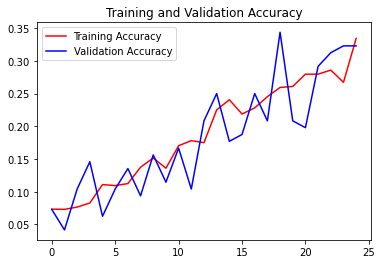

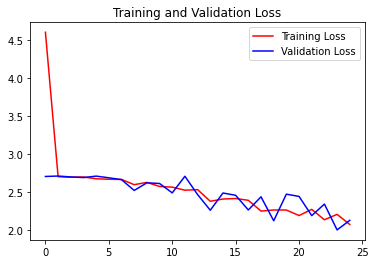

In [266]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

# <center>Second Test<center>

### Transfer Learning

In [10]:
ResNet_V2_50 = 'https://tfhub.dev/google/imagenet/resnet_v2_50/classification/5'
mobilenet_v2_100 = 'https://tfhub.dev/google/imagenet/mobilenet_v2_100_160/classification/5'

In [11]:
base_model = tf.keras.applications.MobileNetV2(input_shape = (160, 160, 3),
                                               include_top = False,
                                               weights = 'imagenet')

9412608/9406464 [==============================] - 6s 1us/step


In [12]:
model = tf.keras.models.Sequential([
    hub.KerasLayer(mobilenet_v2_100, trainable = False, input_shape = (160, 160, 3), name = 'mobilenet_v2_100'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(15, activation = 'softmax')
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_v2_100 (KerasLayer (None, 1001)              3540265   
_________________________________________________________________
flatten (Flatten)            (None, 1001)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               256512    
_________________________________________________________________
dense_1 (Dense)              (None, 15)                3855      
Total params: 3,800,632
Trainable params: 260,367
Non-trainable params: 3,540,265
_________________________________________________________________


In [14]:
model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'adam', 
              metrics = ['accuracy'])

### Prepare the ImageDataGenerator

In [15]:
TRAINING_DIR = 'food_images/train'
training_datagen = ImageDataGenerator(rescale = 1./255)

VALIDATION_DIR = 'food_images/test'
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
  TRAINING_DIR,
  target_size = (160, 160),
  class_mode = 'categorical',
  batch_size = 32,
)

test_generator = training_datagen.flow_from_directory(
  VALIDATION_DIR,
  target_size = (160, 160),
  class_mode = 'categorical',
  batch_size = 32,
)

Found 7464 images belonging to 15 classes.
Found 2988 images belonging to 15 classes.


In [17]:
history = model.fit(train_generator, 
                    validation_data = test_generator, 
                    epochs = 25, 
                    verbose = 1, 
                    steps_per_epoch = 20, 
                    validation_steps = 3)

Epoch 1/25
20/20 [==============================] - 45s 2s/step - loss: 0.7409 - accuracy: 0.7641 - val_loss: 0.5956 - val_accuracy: 0.8021
Epoch 2/25
20/20 [==============================] - 44s 2s/step - loss: 0.4861 - accuracy: 0.8484 - val_loss: 0.4752 - val_accuracy: 0.8646
Epoch 3/25
20/20 [==============================] - 43s 2s/step - loss: 0.6365 - accuracy: 0.8188 - val_loss: 0.6925 - val_accuracy: 0.7812
Epoch 4/25
20/20 [==============================] - 45s 2s/step - loss: 0.6053 - accuracy: 0.8328 - val_loss: 0.5317 - val_accuracy: 0.8438
Epoch 5/25
20/20 [==============================] - 43s 2s/step - loss: 0.5748 - accuracy: 0.8297 - val_loss: 0.4607 - val_accuracy: 0.8958
Epoch 6/25
20/20 [==============================] - 46s 2s/step - loss: 0.5510 - accuracy: 0.8406 - val_loss: 0.7567 - val_accuracy: 0.7708
Epoch 7/25
20/20 [==============================] - 48s 2s/step - loss: 0.4770 - accuracy: 0.8422 - val_loss: 0.5037 - val_accuracy: 0.8021
Epoch 8/25
20/20 [==

### Build the Model

In [18]:
model2 = tf.keras.models.Sequential([
    hub.KerasLayer(mobilenet_v2_100, trainable = False, input_shape = (160,160,3), name = 'mobilenet_v2_100'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(15, activation = 'softmax')
])

In [19]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_v2_100 (KerasLayer (None, 1001)              3540265   
_________________________________________________________________
flatten_1 (Flatten)          (None, 1001)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               256512    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 15)                3855      
Total params: 3,800,632
Trainable params: 260,367
Non-trainable params: 3,540,265
_________________________________________________________________


In [20]:
model2.compile(loss = 'categorical_crossentropy', 
              optimizer = 'adam', 
              metrics = ['accuracy'])

### Train the Model

In [21]:
history2 = model2.fit(train_generator, 
                      validation_data = test_generator, 
                      epochs = 25, 
                      verbose = 1, 
                      steps_per_epoch = 20, 
                      validation_steps = 3)

Epoch 1/25
20/20 [==============================] - 34s 2s/step - loss: 2.2483 - accuracy: 0.3490 - val_loss: 0.9527 - val_accuracy: 0.6875
Epoch 2/25
20/20 [==============================] - 33s 2s/step - loss: 1.1142 - accuracy: 0.6484 - val_loss: 0.9777 - val_accuracy: 0.6875
Epoch 3/25
20/20 [==============================] - 39s 2s/step - loss: 0.8353 - accuracy: 0.7297 - val_loss: 0.7940 - val_accuracy: 0.7188
Epoch 4/25
20/20 [==============================] - 29s 1s/step - loss: 0.9033 - accuracy: 0.7109 - val_loss: 0.5775 - val_accuracy: 0.8021
Epoch 5/25
20/20 [==============================] - 42s 2s/step - loss: 0.7767 - accuracy: 0.7812 - val_loss: 0.7503 - val_accuracy: 0.7708
Epoch 6/25
20/20 [==============================] - 46s 2s/step - loss: 0.7978 - accuracy: 0.7672 - val_loss: 0.6999 - val_accuracy: 0.8021
Epoch 7/25
20/20 [==============================] - 46s 2s/step - loss: 0.7086 - accuracy: 0.7844 - val_loss: 0.4363 - val_accuracy: 0.8333
Epoch 8/25
20/20 [==

### Evaluate the Model

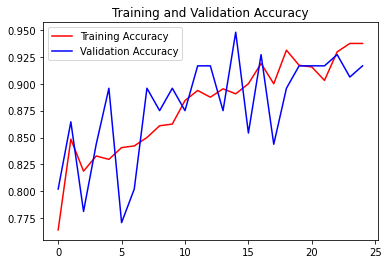

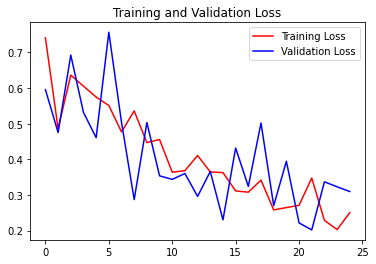

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

### Save the Model

In [23]:
model2.save('CapstoneModel90val')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


INFO:tensorflow:Assets written to: CapstoneModel90val\assets


INFO:tensorflow:Assets written to: CapstoneModel90val\assets


In [24]:
!zip -r /content/capstone.zip /content/CapstoneModel90val

'zip' is not recognized as an internal or external command,
operable program or batch file.


In [25]:
model2.save('CapstoneModel90val.h5')

In [26]:
!zip -r /content/capstoneh5.zip /content/CapstoneModel90valh5

'zip' is not recognized as an internal or external command,
operable program or batch file.


# <center>Third Test (Selected Model)<center>

### Transfer Learning

In [5]:
ResNet_V2_50 = 'https://tfhub.dev/google/imagenet/resnet_v2_50/classification/5'
mobilenet_v2_100 = 'https://tfhub.dev/google/imagenet/mobilenet_v2_100_160/classification/5'

In [6]:
base_model = tf.keras.applications.MobileNetV2(input_shape = (160, 160, 3),
                                               include_top = False,
                                               weights = 'imagenet')

In [7]:
model = tf.keras.models.Sequential([
    hub.KerasLayer(mobilenet_v2_100, trainable = False, input_shape = (160, 160, 3), name = 'mobilenet_v2_100'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(15, activation = 'softmax')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_v2_100 (KerasLayer (None, 1001)              3540265   
_________________________________________________________________
flatten (Flatten)            (None, 1001)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               256512    
_________________________________________________________________
dense_1 (Dense)              (None, 15)                3855      
Total params: 3,800,632
Trainable params: 260,367
Non-trainable params: 3,540,265
_________________________________________________________________


In [9]:
model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'adam', 
              metrics = ['accuracy'])

### Prepare the ImageDataGenerator

In [10]:
TRAINING_DIR = 'food_images/train'
training_datagen = ImageDataGenerator(rescale = 1./255)

VALIDATION_DIR = 'food_images/test'
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
  TRAINING_DIR,
  target_size = (160, 160),
  class_mode = 'categorical',
  batch_size = 32,
)

test_generator = training_datagen.flow_from_directory(
  VALIDATION_DIR,
  target_size = (160, 160),
  class_mode = 'categorical',
  batch_size = 32,
)

Found 7464 images belonging to 15 classes.
Found 2988 images belonging to 15 classes.


In [12]:
history = model.fit(train_generator, 
                      validation_data = test_generator, 
                      epochs = 15, 
                      verbose = 1, 
                      steps_per_epoch = 20, 
                      validation_steps = 3)

Epoch 1/15
20/20 [==============================] - 26s 1s/step - loss: 1.9219 - accuracy: 0.4219 - val_loss: 0.9905 - val_accuracy: 0.7083
Epoch 2/15
20/20 [==============================] - 30s 1s/step - loss: 1.0524 - accuracy: 0.6812 - val_loss: 0.5270 - val_accuracy: 0.7812
Epoch 3/15
20/20 [==============================] - 24s 1s/step - loss: 0.8045 - accuracy: 0.7297 - val_loss: 0.7630 - val_accuracy: 0.7188
Epoch 4/15
20/20 [==============================] - 27s 1s/step - loss: 0.7538 - accuracy: 0.7937 - val_loss: 0.8255 - val_accuracy: 0.7083
Epoch 5/15
20/20 [==============================] - 26s 1s/step - loss: 0.7555 - accuracy: 0.7750 - val_loss: 0.7979 - val_accuracy: 0.7708
Epoch 6/15
20/20 [==============================] - 28s 1s/step - loss: 0.6571 - accuracy: 0.8031 - val_loss: 0.4529 - val_accuracy: 0.8542
Epoch 7/15
20/20 [==============================] - 25s 1s/step - loss: 0.6383 - accuracy: 0.8031 - val_loss: 0.6377 - val_accuracy: 0.8125
Epoch 8/15
20/20 [==

### Build the Model

In [13]:
model3 = tf.keras.models.Sequential([
    hub.KerasLayer(mobilenet_v2_100, trainable = False, input_shape = (160,160,3), name = 'mobilenet_v2_100'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(15, activation = 'softmax')
])

In [14]:
model3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_v2_100 (KerasLayer (None, 1001)              3540265   
_________________________________________________________________
flatten_1 (Flatten)          (None, 1001)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               513024    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 15)                3855      
Total params: 4,188,472
Trainable params: 648,207
Non-trainable params: 3,540,265
______________________________________

In [15]:
model3.compile(loss = 'categorical_crossentropy', 
              optimizer = 'adam', 
              metrics = ['accuracy'])

### Train the Model

In [16]:
history3 = model3.fit(train_generator, 
                      validation_data = test_generator, 
                      epochs = 15, 
                      verbose = 1, 
                      steps_per_epoch = 20, 
                      validation_steps = 3)

Epoch 1/15
20/20 [==============================] - 23s 1s/step - loss: 1.9418 - accuracy: 0.4281 - val_loss: 1.1505 - val_accuracy: 0.6458
Epoch 2/15
20/20 [==============================] - 18s 902ms/step - loss: 1.0844 - accuracy: 0.6875 - val_loss: 0.7487 - val_accuracy: 0.7292
Epoch 3/15
20/20 [==============================] - 21s 1s/step - loss: 0.9243 - accuracy: 0.7078 - val_loss: 0.5964 - val_accuracy: 0.8229
Epoch 4/15
20/20 [==============================] - 17s 866ms/step - loss: 0.7672 - accuracy: 0.7688 - val_loss: 0.5119 - val_accuracy: 0.8229
Epoch 5/15
20/20 [==============================] - 19s 943ms/step - loss: 0.8401 - accuracy: 0.7565 - val_loss: 0.7295 - val_accuracy: 0.7396
Epoch 6/15
20/20 [==============================] - 16s 816ms/step - loss: 0.7272 - accuracy: 0.7625 - val_loss: 0.8888 - val_accuracy: 0.6771
Epoch 7/15
20/20 [==============================] - 19s 943ms/step - loss: 0.7941 - accuracy: 0.7531 - val_loss: 0.6695 - val_accuracy: 0.7708
Epoch

### Evaluate the Model

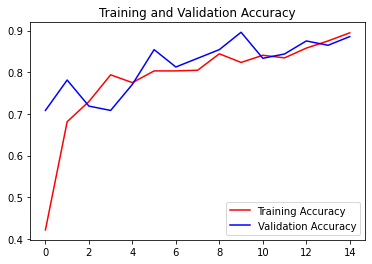

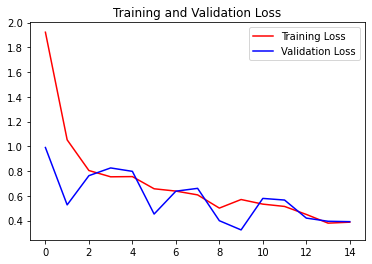

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

### Save the Model

In [18]:
model3.save('CapstoneModel90val')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


INFO:tensorflow:Assets written to: CapstoneModel90val\assets


INFO:tensorflow:Assets written to: CapstoneModel90val\assets


In [19]:
!zip -r /content/capstone.zip /content/CapstoneModel90val

'zip' is not recognized as an internal or external command,
operable program or batch file.


In [21]:
model3.save('CapstoneModel90val.h5')

In [22]:
!zip -r /content/capstoneh5.zip /content/CapstoneModel90valh5

'zip' is not recognized as an internal or external command,
operable program or batch file.


# <center>Fourth Test<center>

### Build the Model

In [280]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(15, activation = 'softmax'), 
])

In [281]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_22 (Flatten)         (None, 20736)             0         
_________________________________________________________________
dense_44 (Dense)             (None, 512)             

In [282]:
model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'adam', 
              metrics = ['accuracy'])

### Prepare the ImageDataGenerator

In [283]:
train_dir = 'food_images/train'
training_datagen = ImageDataGenerator(rescale = 1./255)

test_dir = 'food_images/test'
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
   train_dir,
   target_size = (150, 150),
   class_mode = 'categorical',
   batch_size = 32
)

validation_generator = validation_datagen.flow_from_directory(
   test_dir,
   target_size = (150, 150),
   class_mode='categorical',
   batch_size = 32
)

Found 7464 images belonging to 15 classes.
Found 2988 images belonging to 15 classes.


### Train the Model

In [284]:
history = model.fit(train_generator, 
                    epochs = 25, 
                    steps_per_epoch = 20, 
                    validation_data = validation_generator, 
                    verbose = 1, 
                    validation_steps = 3)

Epoch 1/25
20/20 [==============================] - 19s 969ms/step - loss: 3.1681 - accuracy: 0.0672 - val_loss: 2.7077 - val_accuracy: 0.0833
Epoch 2/25
20/20 [==============================] - 19s 957ms/step - loss: 2.7055 - accuracy: 0.0812 - val_loss: 2.6616 - val_accuracy: 0.0833
Epoch 3/25
20/20 [==============================] - 19s 927ms/step - loss: 2.6875 - accuracy: 0.1125 - val_loss: 2.6437 - val_accuracy: 0.1146
Epoch 4/25
20/20 [==============================] - 16s 823ms/step - loss: 2.6632 - accuracy: 0.0828 - val_loss: 2.6758 - val_accuracy: 0.0625
Epoch 5/25
20/20 [==============================] - 18s 880ms/step - loss: 2.5855 - accuracy: 0.1375 - val_loss: 2.5762 - val_accuracy: 0.1771
Epoch 6/25
20/20 [==============================] - 20s 1s/step - loss: 2.5408 - accuracy: 0.1734 - val_loss: 2.5820 - val_accuracy: 0.1667
Epoch 7/25
20/20 [==============================] - 17s 867ms/step - loss: 2.4888 - accuracy: 0.1797 - val_loss: 2.4187 - val_accuracy: 0.1771
Ep

### Evaluate the Model

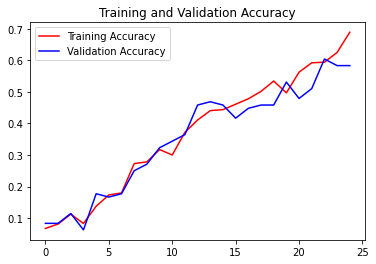

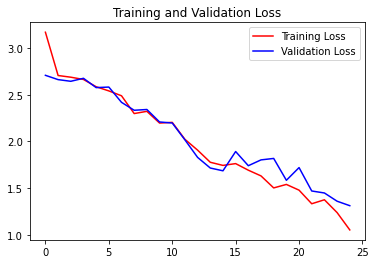

In [285]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

# <center>Predicting the Image<center>

In [ ]:
def predictimage(imgpath):
    img_width, img_height = 160, 160
    img = image.load_img(imgpath, target_size = (img_width, img_height))
    x = image.img_to_array(img) 
    x /= 255
    x = np.expand_dims(x, axis = 0)
    images = np.vstack([x])
    classes = model.predict(images)
    # print(classes)
    print(np.argmax(classes, axis = 1))

In [ ]:
testing = '/food_images/test/ayam_goreng'

for x in os.listdir(testing):
    filename = os.path.join(testing + '/' + x)
    predictimage(filename)

In [ ]:
uploaded=files.upload()

for fn in uploaded.keys():
    # predicting images
    path = '/content/' + fn
    img = image.load_img(path, target_size = (160, 160))

    x = image.img_to_array(img)
    x /= 255
    x=np.expand_dims(x, axis = 0)
    images = np.vstack([x])

    classes = model.predict(images, batch_size=6)
    print(classes)

    output_class = np.argmax(classes)
    classname = ["ayam_goreng", "bakso", "batagor", "bubur", "burger", "capcay", "crepes", "cumi_goreng_tepung", "fu_yung_hai", "gado_gado", "gudeg", "ikan_bakar", "kebab", "rendang", "sate"]
    print("The predicted class is", classname[output_class])